# Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing Data
#### 6. Autocorrelation

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'yyWnNKbMypSNxS_89rxW'

In [3]:
# Importing the German Consumer Price Index Data
# I could not find a data set that relates to my project, the closest i could find is consumer price index, which is of interest to me. 
data = quandl.get('RATEINF/CPI_DEU')

In [4]:
data.head()

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7


In [5]:
data.shape

(392, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

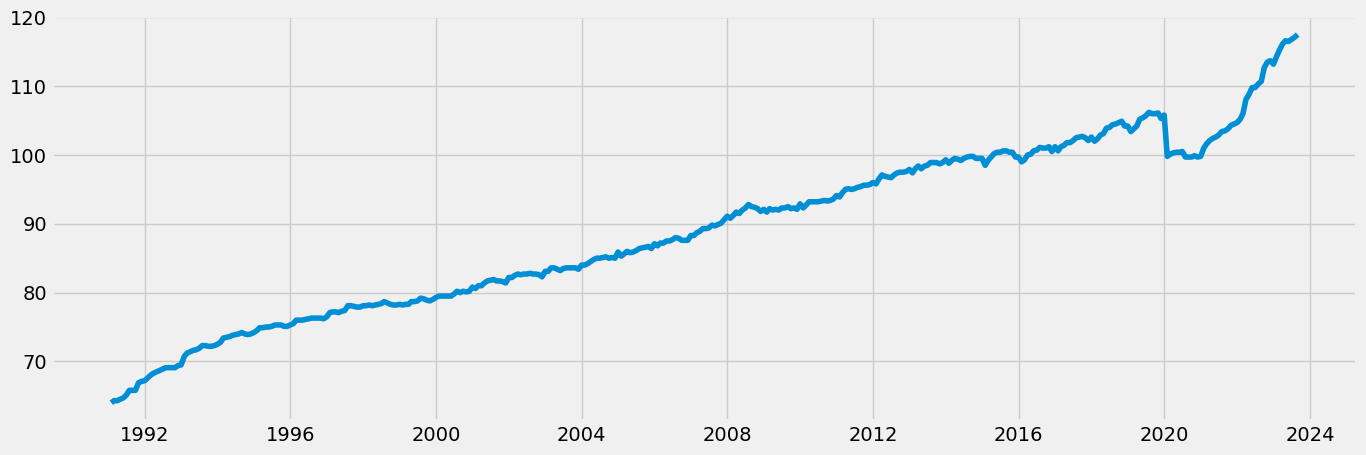

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

I do not believe a subset is necessary in this scenario, as data only dates back to 1990, which is relevant to our understanding of trends in energy consumption over time. 

### 3. Time-series analysis: decomposition

In [9]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [10]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

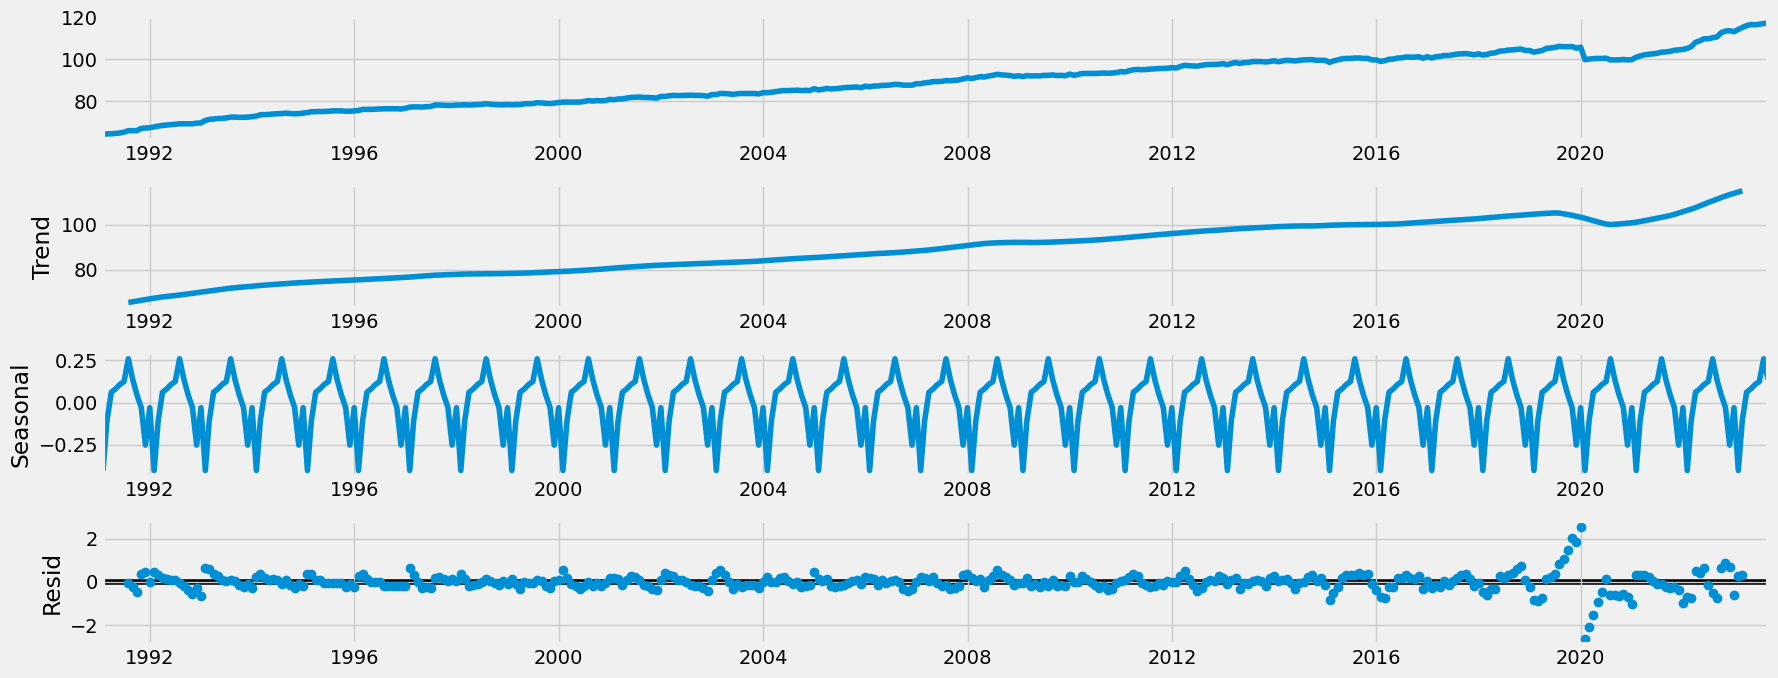

In [11]:
# Plot separate components

decomposition.plot()
plt.show()

**From our decomposition analysis, we see that there is an upward trend in our consumer price index in the the German eceonomy. The trend in our graph shows an upward linear trend, rising steadily over the year with the exception of 2012, perhpas explained by the macroeconomic impact of Covid on many economies, and now ofcourse we see a rise as economies normalised and prices start to rise again. There is seasonality in our data, as we see a consistent peak and fall at regular intervals. Finally, checking the residual chart which shows the presence of noise in the data, indicates that there is little unexplained noise, apart from the period of time around 202 and Covid impact.**

### 4. Testing for stationarity

In [12]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.445036
p-value                          0.983103
Number of Lags Used             12.000000
Number of Observations Used    379.000000
Critical Value (1%)             -3.447722
Critical Value (5%)             -2.869196
Critical Value (10%)            -2.570849
dtype: float64


**The test statistic is larger than the critical value, so we must stationarize the data.**

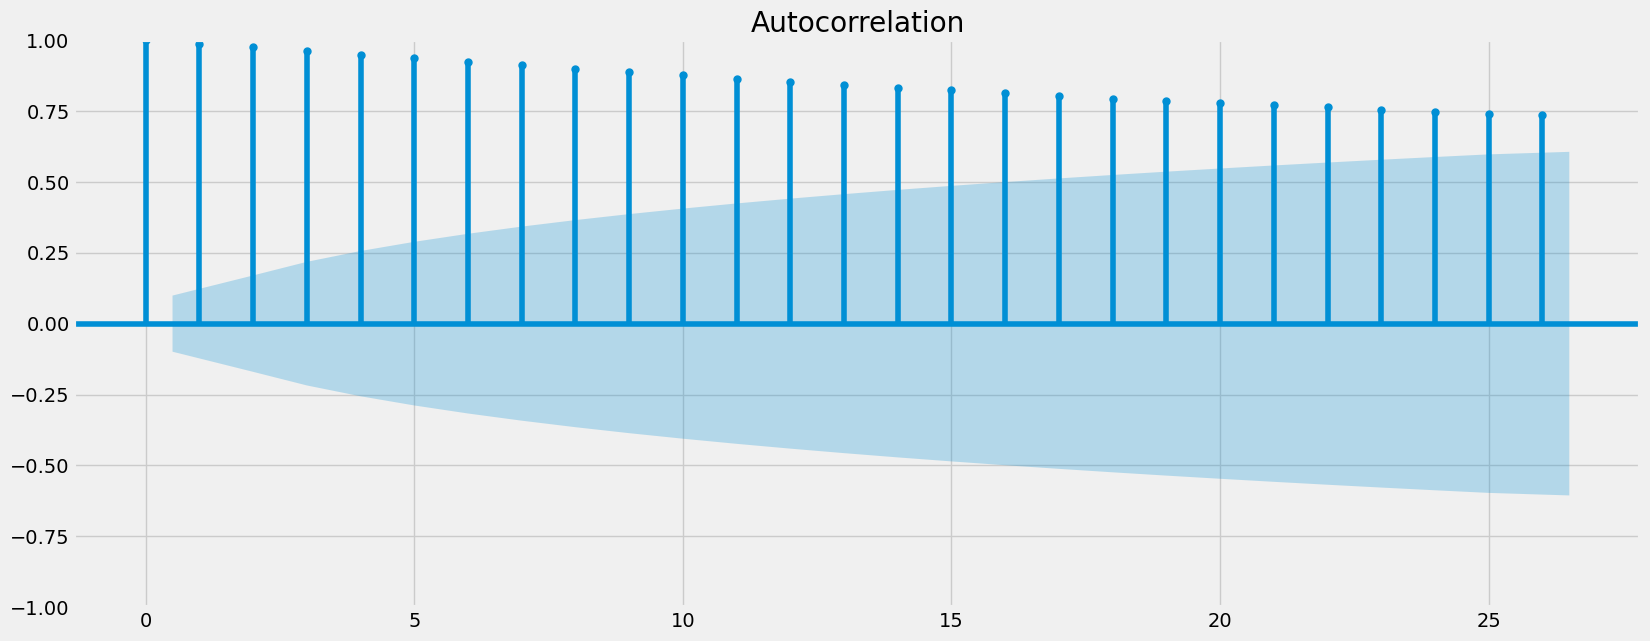

In [13]:
# Autocorrelations plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

### 5. Stationarizing Data

In [14]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [15]:
data_diff.dropna(inplace = True) # Remove the missing values that came about as a result of the differencing. 

In [16]:
data_diff.head()

,Value
Date,
1991-02-28,0.3
1991-03-31,0.0
1991-04-30,0.2
1991-05-31,0.2
1991-06-30,0.4


In [17]:
data_diff.columns

Index(['Value'], dtype='object')

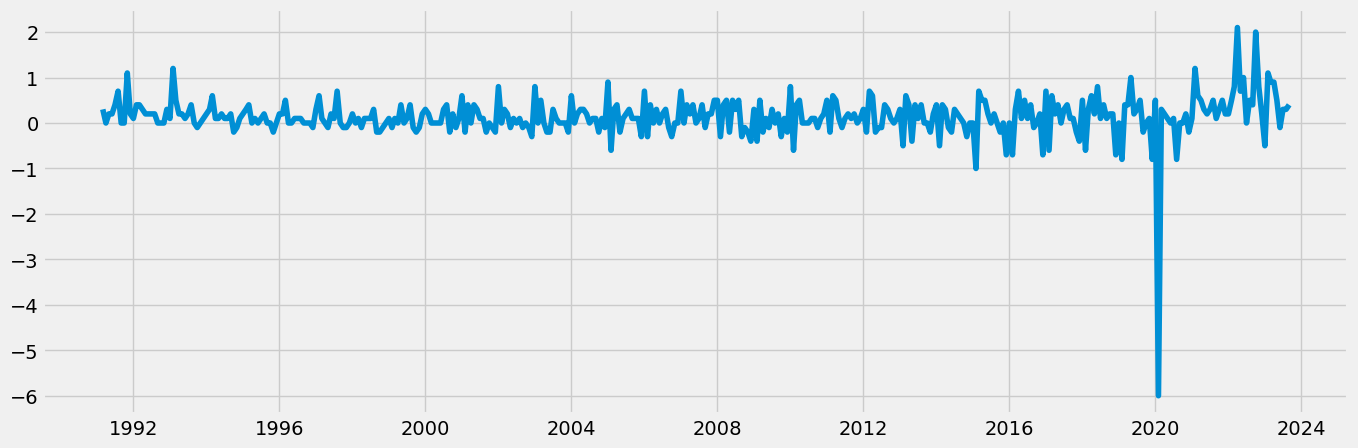

In [18]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [19]:
#Re-run Dickey-Fuller test

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.430342
p-value                          0.009967
Number of Lags Used             11.000000
Number of Observations Used    379.000000
Critical Value (1%)             -3.447722
Critical Value (5%)             -2.869196
Critical Value (10%)            -2.570849
dtype: float64


Test statistic is now smaller than both the 5% and 10% Critical Values. Another round of differencing not necessary.

## 6. Autocorrelations

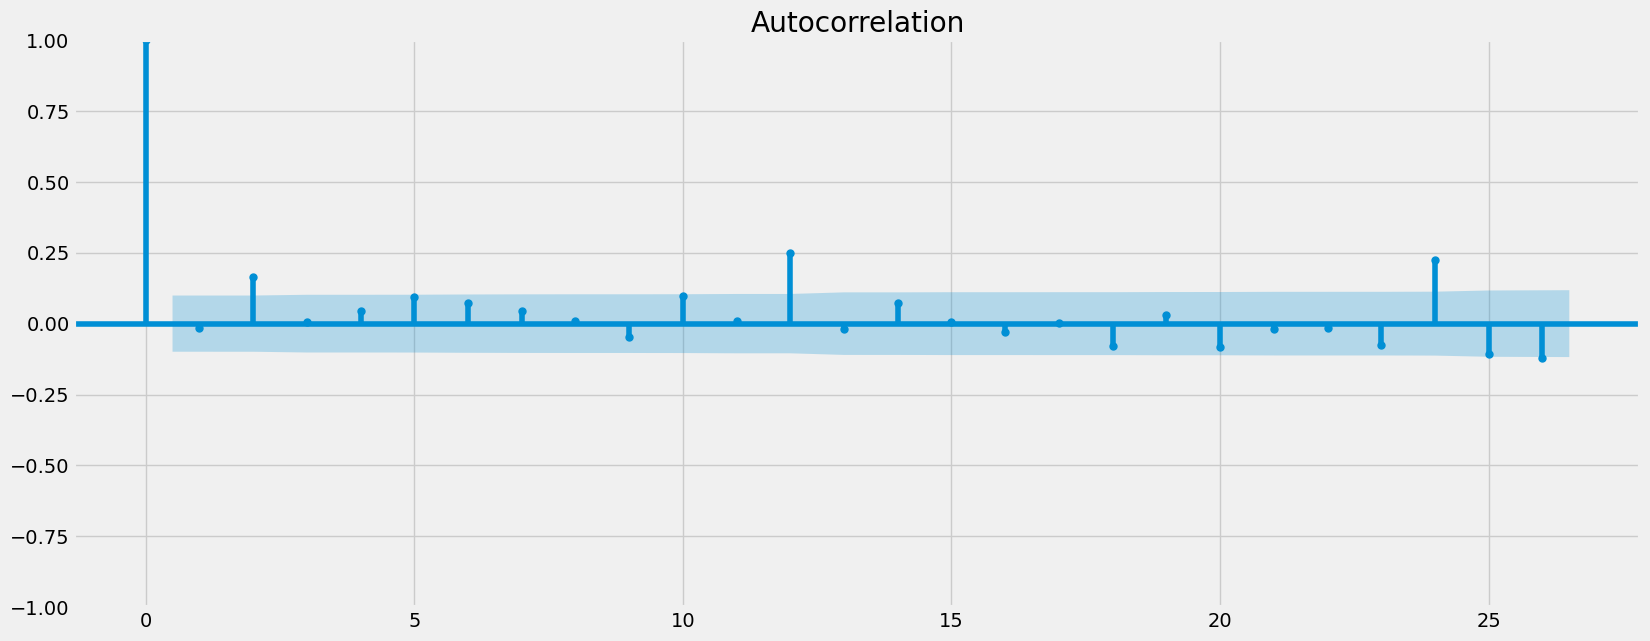

In [20]:
plot_acf(data_diff)
plt.show()

**While there are still a few lags above the blue confidence interval, there are over 10 of them so I will choose to stop here!**